<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 12 – Feature Matching, Face Detection, Face Tracking

**Nama :** Muhamad Anang Abdullah Faqih

**Kelas :** D4 TI 3D

**NIM :** 2241720070

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

1. Melakukan face detection

In [2]:
def face_detection(img, scale_factor=1.1, min_neighbors=5, min_size=(30, 30)):
    haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')

    if len(img.shape) == 3:
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    else:
        img_gray = img.copy()

    if img_gray.dtype != 'uint8':
        img_gray = (img_gray * 255).astype('uint8')

    faces = haar_cascade.detectMultiScale(img_gray, scaleFactor=scale_factor, minNeighbors=min_neighbors, minSize=min_size)

    img_copy = img.copy()

    for (x, y, w, h) in faces:
        cv.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return img_copy

In [3]:
def show_image(img, img_with_bounding_box):
  plt.figure(figsize=(10, 10))

  plt.subplot(121)
  plt.imshow(img)
  plt.title('Gambar Asli')
  plt.axis('off')

  plt.subplot(122)
  plt.imshow(img_with_bounding_box)
  plt.title('Gambar Setelah Face Detection')
  plt.axis('off')

  plt.show()

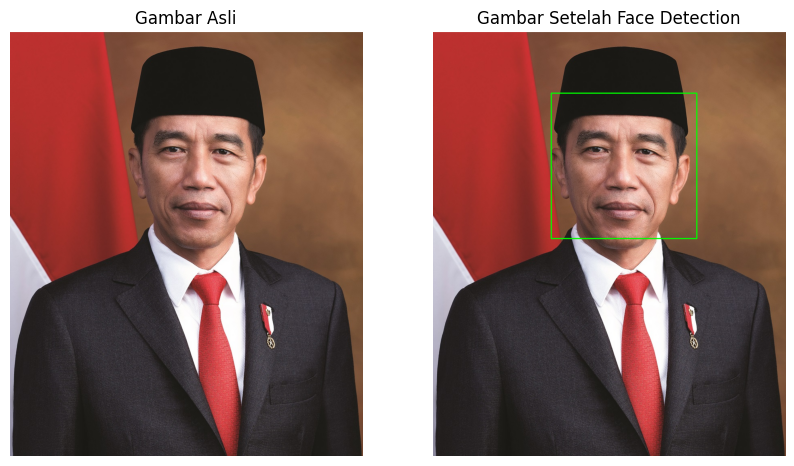

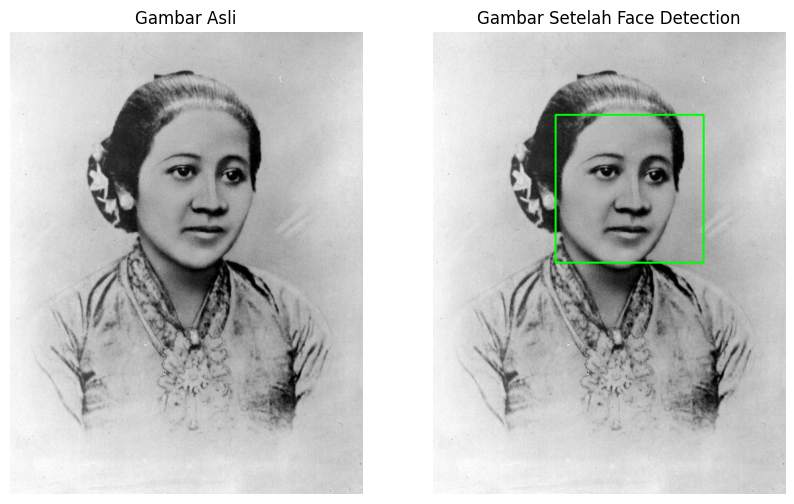

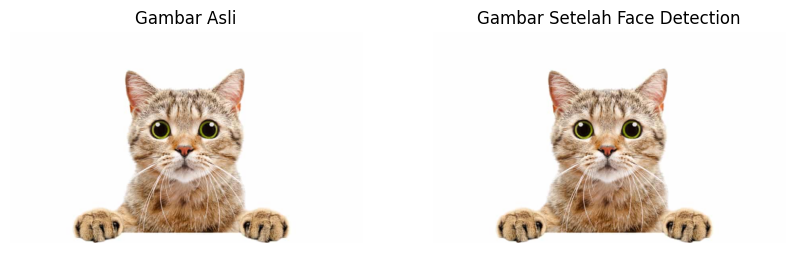

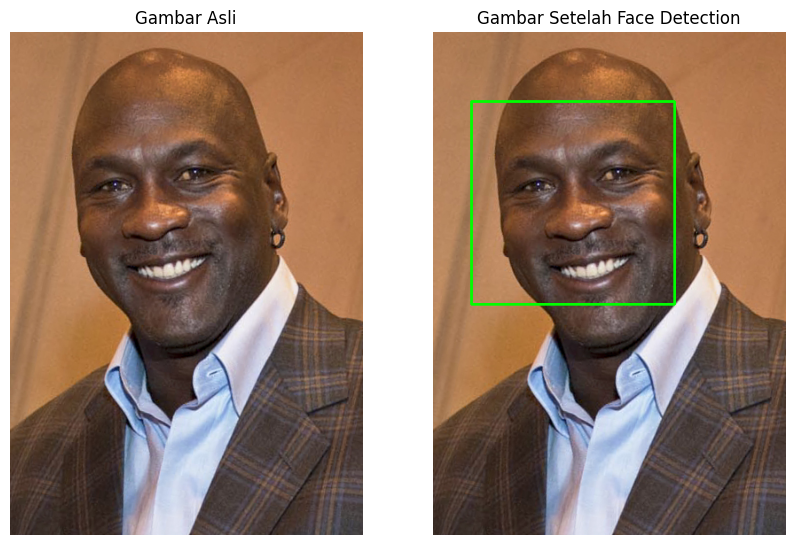

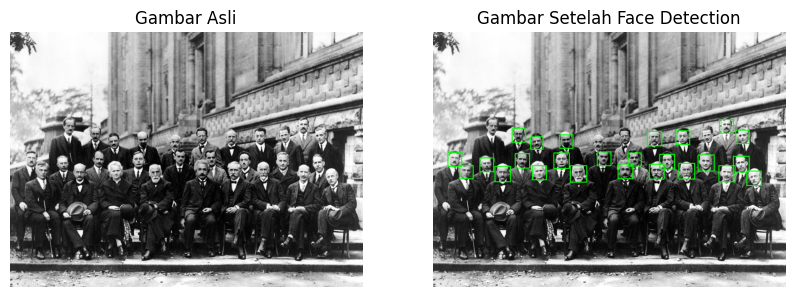

In [4]:
# Joko Widodo
img1 = plt.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
img_with_bounding_box1 = face_detection(img1)
show_image(img1, img_with_bounding_box1)

# RA Kartini
img2 = plt.imread('/content/drive/MyDrive/Images/facedet/kartini.jpg')
img_with_bounding_box2 = face_detection(img2)
show_image(img2, img_with_bounding_box2)

# Kucing
img3 = plt.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
img_with_bounding_box3 = face_detection(img3)
show_image(img3, img_with_bounding_box3)

# mjordan
img4 = plt.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
img_with_bounding_box4 = face_detection(img4)
show_image(img4, img_with_bounding_box4)

# solvayconf
img5 = plt.imread('/content/drive/MyDrive/Images/facedet/solvayconf.jpg')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
img_with_bounding_box5 = face_detection(img5)
show_image(img5, img_with_bounding_box5)

Deteksi wajah kicomg

In [5]:
detector = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalcatface.xml')
img_cat = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
img_cat = cv.cvtColor(img_cat, cv.COLOR_BGR2RGB)
img_cat_face = detector.detectMultiScale(img_cat, scaleFactor=1.05, minNeighbors=10, minSize=(20, 20))

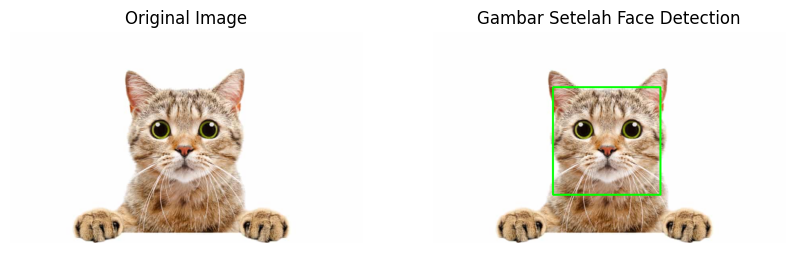

In [6]:
cat_copy = img_cat.copy()

if len(img_cat_face) > 0:
  largest_face = max(img_cat_face, key=lambda rect: rect[2] * rect[3])
  x, y, w, h = largest_face

  cv.rectangle(cat_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)
else:
  print("Tidak ada wajah yang terdeteksi")

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img_cat)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cat_copy)
plt.title('Gambar Setelah Face Detection')
plt.axis('off')

plt.show()

3. Eyes Detection

In [7]:
detector = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_eye.xml')
img_jokowi = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
img_jokowi = cv.cvtColor(img_jokowi, cv.COLOR_BGR2RGB)
eyes = detector.detectMultiScale(img_jokowi, scaleFactor=1.05, minNeighbors=10, minSize=(20, 20))

In [8]:
jokowi_copy = img_jokowi.copy()

for (x, y, w, h) in eyes:
  cv.rectangle(jokowi_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)

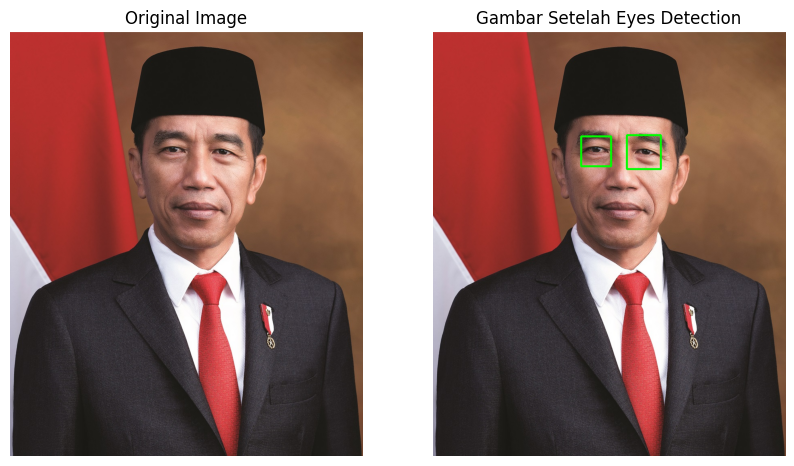

In [9]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img_jokowi)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(jokowi_copy)
plt.title('Gambar Setelah Eyes Detection')
plt.axis('off')

plt.show()

4. Face Tracking

In [10]:
from IPython.display import Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import io
import time
import PIL
import html

In [11]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')

In [12]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

In [13]:
def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [14]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

In [15]:
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
video_stream()

label_html = 'Capturing...'

bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])

    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

5. Bluring

In [ ]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
img_jordan = plt.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
face = face_cascade.detectMultiScale(img_jordan, scaleFactor=1.05, minNeighbors=10, minSize=(20, 20))

In [ ]:
jordan_copy = img_jordan.copy()

for (x, y, w, h) in face:
  face_img = img_jordan[y:y+h, x:x+w]
  blurred = cv.GaussianBlur(face_img, (11, 11), 30)
  jordan_copy[y:y+h, x:x+w] = blurred

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(img_jordan)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(jordan_copy)
plt.title('Gambar Setelah Face Detection')
plt.axis('off')

plt.show()

6. segmentasi KTP

In [ ]:
face_casscade = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')
img_ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')
blured = img_ktp.copy()
gray = blured.copy()

In [ ]:
img_ktp = cv.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')
blured = img_ktp.copy()
gray = blured.copy()

In [ ]:
blured = cv.GaussianBlur(img_ktp, (5, 5), 0.5)
gray = cv.cvtColor(gray, cv.COLOR_BGR2GRAY)

ret, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

In [ ]:
plt.imshow(bw, cmap='gray')

In [ ]:
kernel = np.ones((2, 2), np.uint8)
morph_img = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

final_img = cv.bitwise_not(morph_img)

In [ ]:
plt.imshow(final_img, cmap='gray')
plt.axis
plt.show()

In [ ]:
contours, hierarchy = cv.findCounturs(final_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
min_area = 55
max_area = 130
aspect_ratio_range = (0.01, .09)
output_img = img_ktp.copy()

for contour in contours:
  x, y, w, h = cv.boundingRect(contour)
  area - cv.countourArea(contour)
  aspect_ratio = float(w) / h

  if min_area <= area <= max_area and aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1]:
    cv.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 1)

In [ ]:
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
segmented_img_copy = output_img.copy()

for(x, y, w, h) in segmented_img:
  cv.rectangle(segmented_img_copy, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(cv.cvtColor(segmented_img_copy, cv.COLOR_BGR2RGB))
plt.show()

7.Cropped NIK

In [ ]:
cropped_nik = segmented_img_copy[40:80, 110:340]
plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))

9. Deep Learning OCR

In [ ]:
from tqdm import tqdm
import random
import pickle
import os

In [ ]:
datadir =